# Regressão Linear Simples: Previsão de Limite de Crédito
---
Neste case, você deverá aplicar a regressão linear simples para estimar o limite de crédito de clientes de um banco, a partir do score deles no Serasa. O seu dataset (disponível no link abaixo) contém duas colunas: `Score` e `Limit`. Aplique a regressão linear, utilizando o `LinearRegression` do `sklearn` e, também, o `OLS` do `statsmodels`.

Observe as características do erro, bem como calcule as métricas vistas durante a aula.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("https://s3-sa-east-1.amazonaws.com/lcpi/7c85cb96-165c-49a6-90f6-e35575a4dafe.csv")
df.head()

,Limit,Score
0,3606,283
1,6645,483
2,7075,514
3,9504,681
4,4897,357


<AxesSubplot:xlabel='Score', ylabel='Limit'>

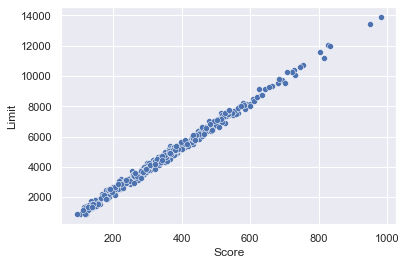

In [5]:
sns.scatterplot(x=df.Score, y=df.Limit)

In [6]:
# Variável de entrada
X = df['Score']

# Variável de saída
y = df['Limit']

In [7]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression().fit(X.values.reshape(-1, 1), y.values)

In [13]:
lr.coef_[0]

14.871607116658874

In [12]:
lr.intercept_

-542.9282299869001

In [15]:
y_est = lr.predict(X.values.reshape(-1, 1))

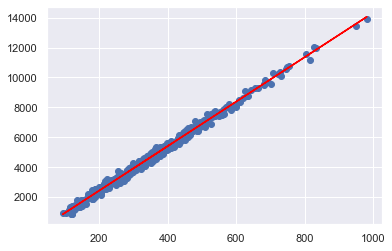

In [17]:
plt.scatter(X, y)
plt.plot(X, y_est, color='red')

In [20]:
from sklearn.metrics import r2_score

In [21]:
print(lr.score(X.values.reshape(-1, 1), y))
print(r2_score(y, y_est))

0.9937692100445441
0.9937692100445441


In [22]:
import statsmodels.api as sm

In [30]:
x = sm.add_constant(X)
model = sm.OLS(y, x)
results = model.fit()
results.params

const   -542.928230
Score     14.871607
dtype: float64

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:02:47   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Score         14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
results.resid

0      -59.736584
1        4.941993
2      -26.077828
3      -80.636216
4      130.764489
          ...    
395     77.344845
396    -21.067477
397    -59.857654
398    212.579664
399   -104.788723
Length: 400, dtype: float64

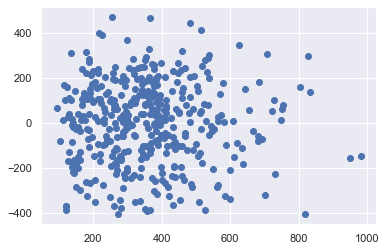

In [34]:
plt.scatter(X, results.resid)

In [35]:
results.params

const   -542.928230
Score     14.871607
dtype: float64

In [36]:
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          -542.9282     22.850    -23.760      0.000    -587.851    -498.006


In [37]:
print(results.f_test(np.identity(2)))

<F test: F=array([[166511.46692041]]), p=0.0, df_denom=398, df_num=2>


---

In [ ]:
pn_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")